<a href="https://colab.research.google.com/github/kkiprono4/Hass-Consulting-Company-/blob/main/Hass_Consulting_Company_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## b) Defining the Metric for Success

Beding able to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## c) Understanding the context

Hass Consulting Company is a real estate leader with over 25 years of experience. Hass Consult with its wealth of experience continuously reaps new benefits from opportunities presented by changing market dynamics as well as evolving business and property cycles.

## d) Recording the Experimental Design
* Import the relevant libraries that we will use in our analysis
* Read and explore the dataset
* Data cleaning
* Perform univariate, bivariate and multivariate analysis
* Check for multicollinearity
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Created the different regression models
* Then evaluated the performance of different models

# 2.Importing libraries and reading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Use read_CSV to read an excel sheet from a link
house = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

In [3]:
#preview the first 5 records
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#preview the last 5 records
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


## Checking data

In [5]:
#checking the columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Check the shape  
print('The total number of records in the house dataset is : \n{}'.format(house.shape[0]))
print('The total number of variables in the house dataset is: \n {}'.format(house.shape[1]))

The total number of records in the house dataset is : 
21613
The total number of variables in the house dataset is: 
 20


In [7]:
#summary statistics
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 3. Tidying the dataset

## a.Dropping Column(s)

In [8]:
#Dropping the ID, latitude and Longitude columns
house = house.drop(columns = 'id')
house = house.drop(columns = 'lat')
house = house.drop(columns = 'long')


In [9]:
#Checking shape to see the changes
print('The total number of records in the house dataset is : \n{}'.format(house.shape[0]))
print('The total number of variables in the house dataset is: \n {}'.format(house.shape[1]))

The total number of records in the house dataset is : 
21613
The total number of variables in the house dataset is: 
 17


## b.Checking for outliers

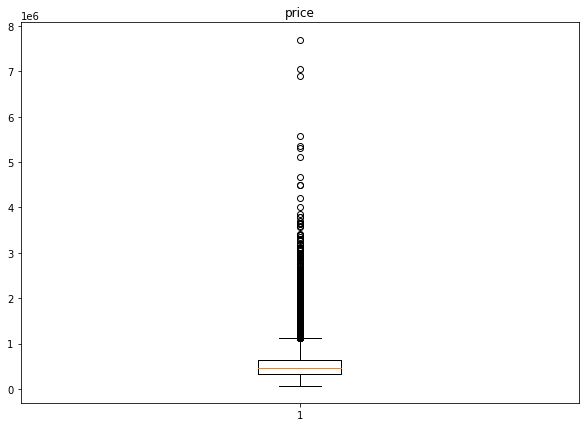

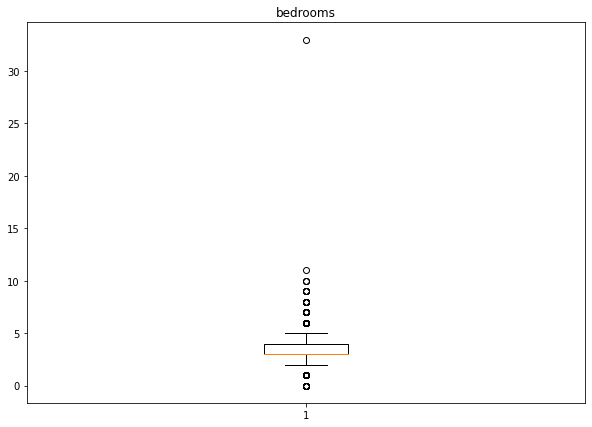

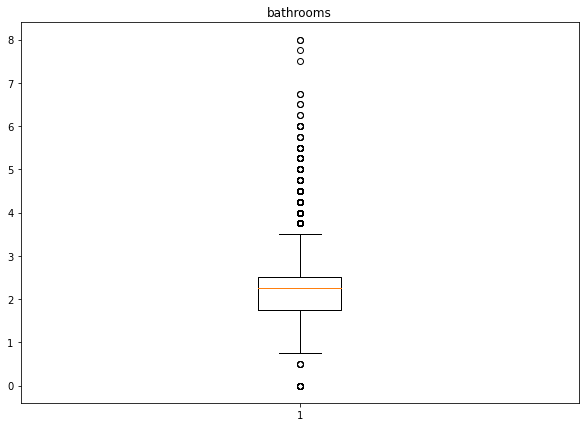

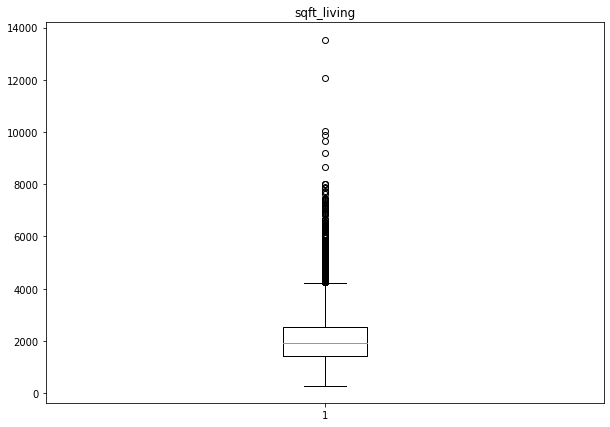

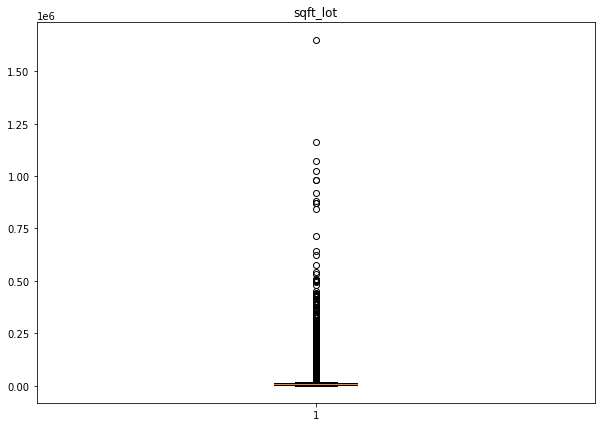

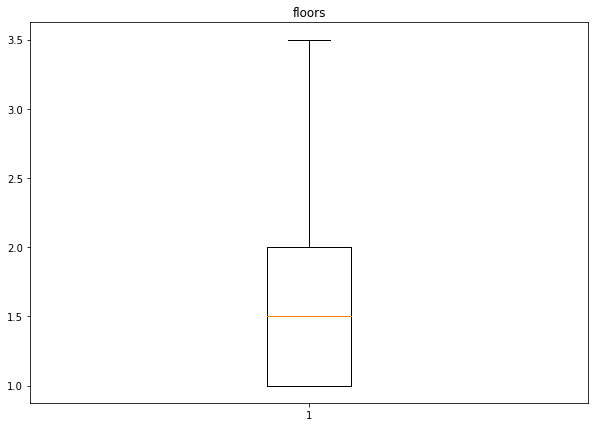

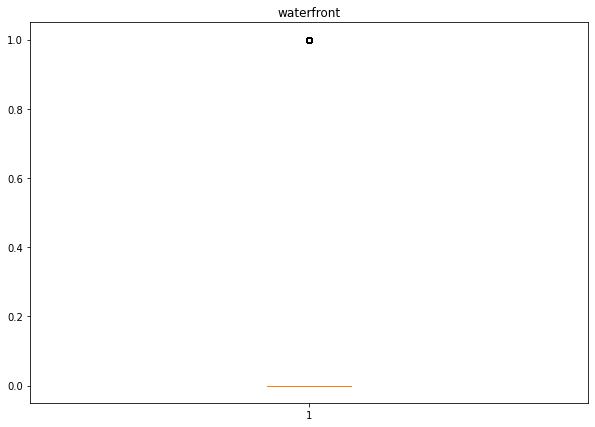

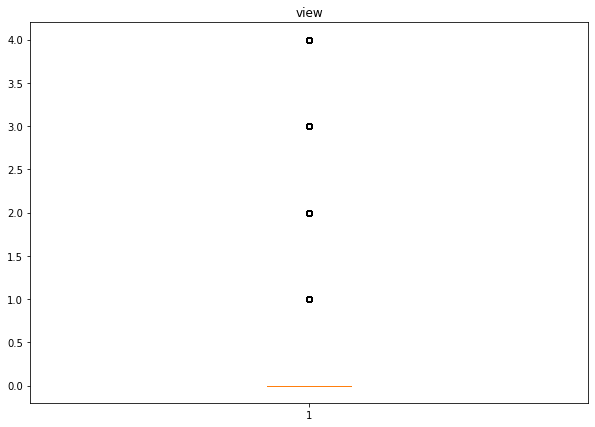

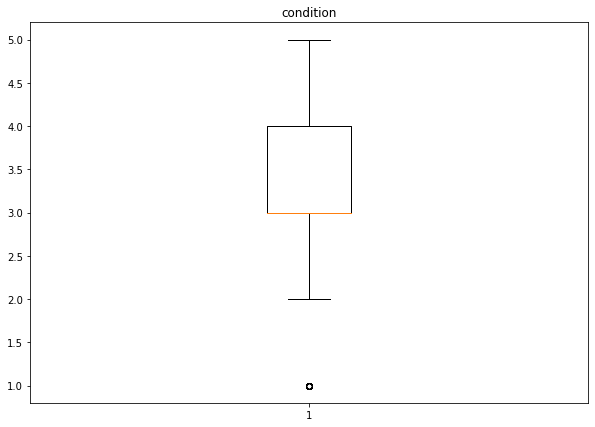

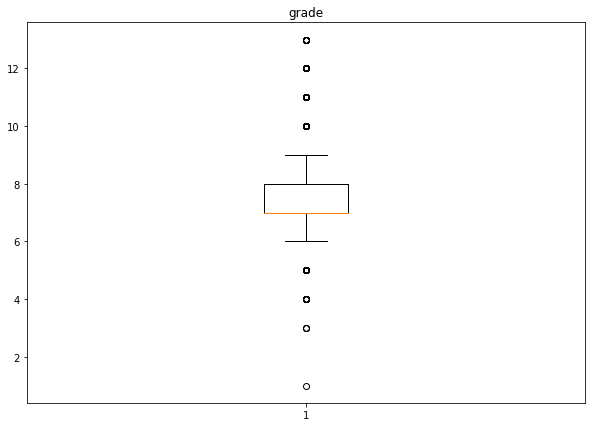

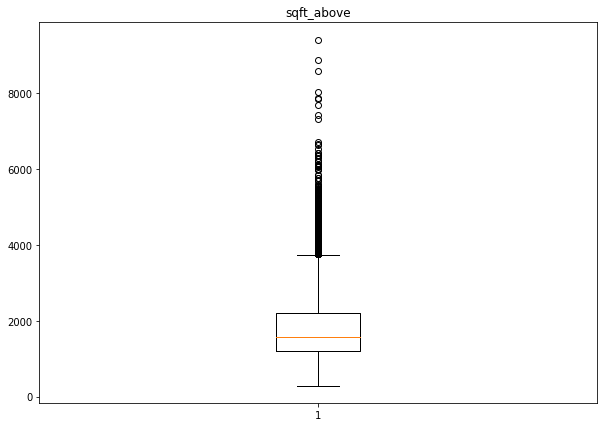

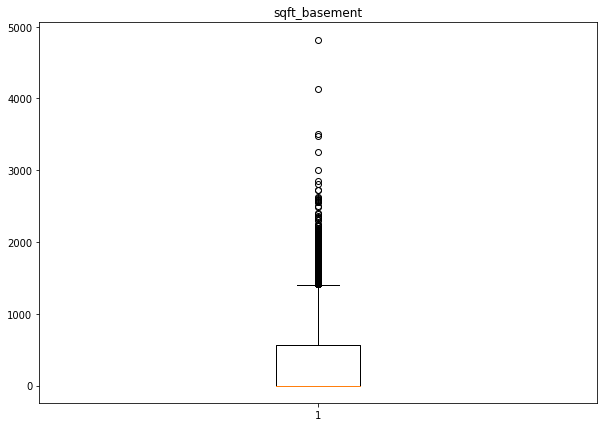

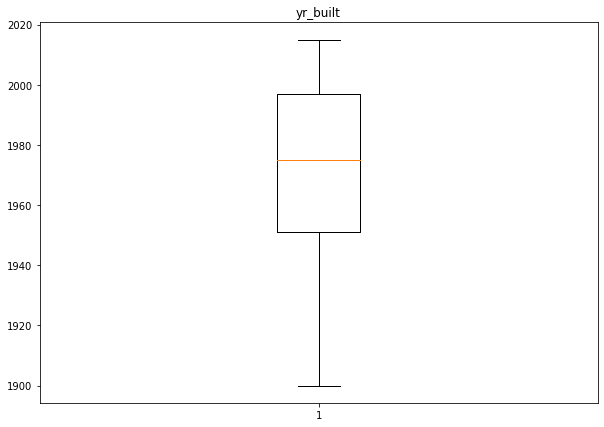

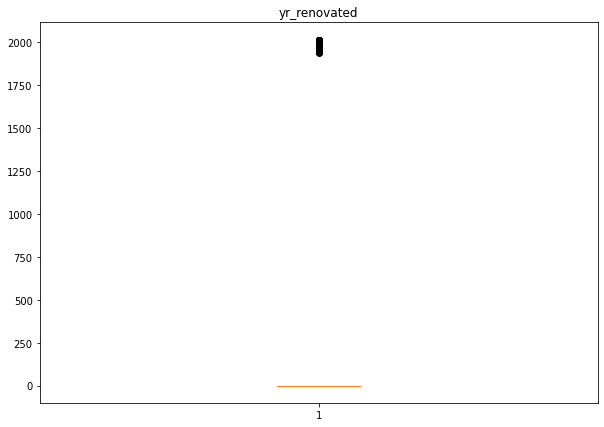

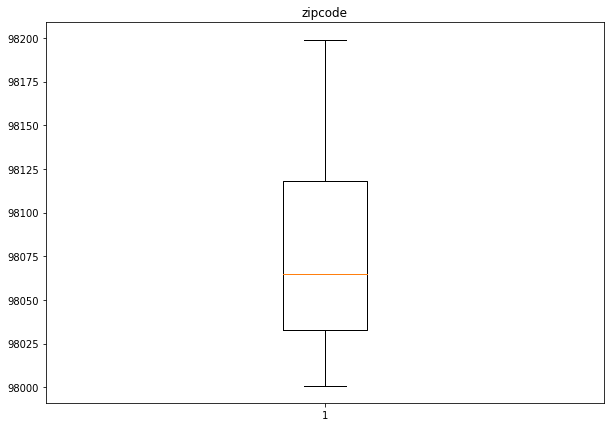

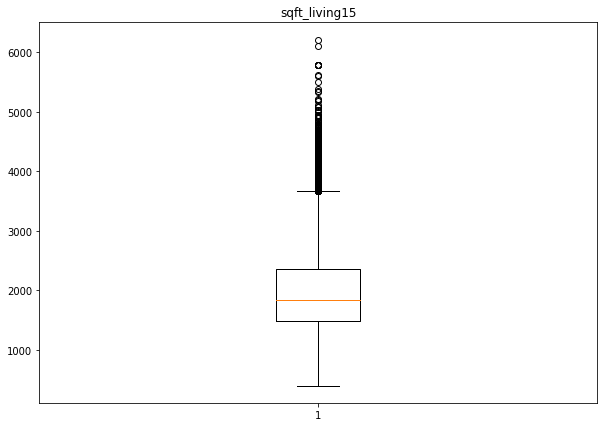

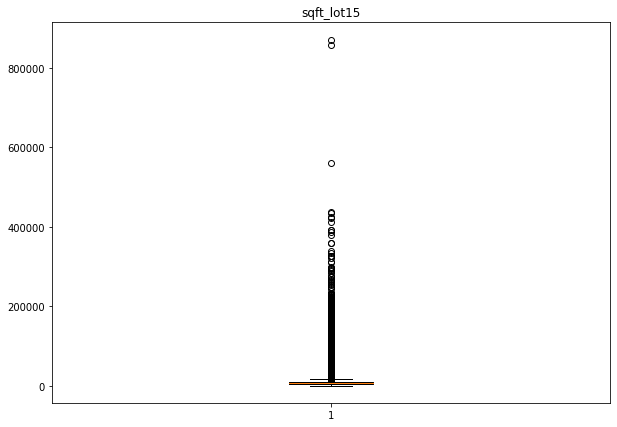

In [10]:
# let's check for outliers in our dataframe
col = house.columns
for i in col:
  fig = plt.figure(figsize = (10,7))
  plt.boxplot(house[i])
  plt.title(i)
  plt.show()

Most of our Data has inconsistencies and outliers but we will keep them for they are useful to us in our subsequent projects.

## c.Checking for Null values and duplicated columns

In [11]:
#Check for null values
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [12]:
#checking for duplicates
house.duplicated().sum()

6

In [13]:
#dropping duplicates
house = house.drop_duplicates()

In [14]:
#confirming if duplicates have been dropped
house.duplicated().sum()

0

# Expoloratory Analysis

## a. Univariate

### 1. mean

In [15]:
print(f'The Mean of price of houses  is:\n {house.price.mean()}')
print(f'The Mean of number of bedrooms in this dataset is is:\n {house.bedrooms.mean()}')
print(f'The Mean of the number of bathrooms in this dataset is: \n{house.bathrooms.mean()}')
print(f'The Mean of the sizes of living rooms in Square feet  is: \n{house.sqft_living.mean()}')
print(f'The Mean of the sizes of the lot in Square feet  is:\n {house.sqft_lot.mean()}')
print(f'The Mean of the number of floors in this house dataset is: \n{house.floors.mean()}')
print(f'The Mean of the number of square feet is:\n {house.waterfront.mean()}')
print(f'The Mean of houses with a view is:\n {house.view.mean()}')
print(f'The Mean of houses with a condition is:\n {house.condition.mean()}')
print(f'The Mean of houses with  a grade is:\n {house.grade.mean()}')
print(f'The Mean of the above in Square feet is is:\n {house.sqft_above.mean()}')
print(f'The Mean of the sizes of  Basement in  square feet is:\n {house.sqft_basement.mean()}')
print(f'The Mean of the above in Square feet is is: \n{house.sqft_above.mean()}')
print(f'The Mean of the sizes of  Basement in  square feet is:\n {house.sqft_basement.mean()}')
print(f'The Mean of the Living room 15 in Square feet is is: \n{house.sqft_living15.mean()}')
print(f'The Mean of the sizes of  Lot 15 in  square feet is:\n {house.sqft_lot15.mean()}')

The Mean of price of houses  is:
 540200.7566066552
The Mean of number of bedrooms in this dataset is is:
 3.370852038691165
The Mean of the number of bathrooms in this dataset is: 
2.1147197667422595
The Mean of the sizes of living rooms in Square feet  is: 
2079.95478317212
The Mean of the sizes of the lot in Square feet  is:
 15110.188226037859
The Mean of the number of floors in this house dataset is: 
1.4941222751885963
The Mean of the number of square feet is:
 0.00754385152959689
The Mean of houses with a view is:
 0.2342296477993243
The Mean of houses with a condition is:
 3.4094969222937013
The Mean of houses with  a grade is:
 7.656639052159022
The Mean of the above in Square feet is is:
 1788.3971860970983
The Mean of the sizes of  Basement in  square feet is:
 291.557597075022
The Mean of the above in Square feet is is: 
1788.3971860970983
The Mean of the sizes of  Basement in  square feet is:
 291.557597075022
The Mean of the Living room 15 in Square feet is is: 
1986.5917

### 2. Median

In [16]:
print(f'The Median of price is: \n {house.price.median()}')
print(f'The Median of number of bedrooms is: \n {house.bedrooms.median()}')
print(f'The Median of number of bathrooms is: \n {house.bathrooms.median()}')
print(f'The Median of the size of Living rooms in square feet is: \n {house.sqft_living.median()}')
print(f'The Median of the size of Lot in square feet is is: \n {house.sqft_lot.median()}')
print(f'The Median of number of floors is: \n {house.floors.median()}')
print(f'The Median of whether a house has a waterfront is: \n {house.waterfront.median()}')
print(f'The Median of the above in square feet is: \n {house.sqft_above.median()}')
print(f'The Median of the basement in squarefeet  is: \n {house.sqft_basement.median()}')
print(f'The Median of the Living 15 in Square feet is is: \n {house.sqft_living15.median()}')
print(f'The Median of Lot 15 in Square feet  is: \n {house.sqft_lot15.median()}')

The Median of price is: 
 450000.0
The Median of number of bedrooms is: 
 3.0
The Median of number of bathrooms is: 
 2.25
The Median of the size of Living rooms in square feet is: 
 1910.0
The Median of the size of Lot in square feet is is: 
 7620.0
The Median of number of floors is: 
 1.5
The Median of whether a house has a waterfront is: 
 0.0
The Median of the above in square feet is: 
 1560.0
The Median of the basement in squarefeet  is: 
 0.0
The Median of the Living 15 in Square feet is is: 
 1840.0
The Median of Lot 15 in Square feet  is: 
 7620.0


### 3. Mode

In [17]:
# Checking the mode, varaince, skewness and kurtosis of our dataframe
for i in col:
  print('The mode of', i, 'is:')
  print(house[i].mode())
  print('The variance of', i, 'is:')
  print(house[i].var())
  print('The skewness of', i, 'is:')
  print(house[i].skew())
  print('The kurtosis of', i, 'is:')
  print(house[i].kurt())
  print('                                    ')

The mode of price is:
0    350000.0
1    450000.0
dtype: float64
The variance of price is:
134987232568.33772
The skewness of price is:
4.021266197038476
The kurtosis of price is:
34.514117297011055
                                    
The mode of bedrooms is:
0    3
dtype: int64
The variance of bedrooms is:
0.8650079891682138
The skewness of bedrooms is:
1.9747321980772032
The kurtosis of bedrooms is:
49.07820461502534
                                    
The mode of bathrooms is:
0    2.5
dtype: float64
The variance of bathrooms is:
0.5932877847907887
The skewness of bathrooms is:
0.5112068282126112
The kurtosis of bathrooms is:
1.279210081383435
                                    
The mode of sqft_living is:
0    1300
dtype: int64
The variance of sqft_living is:
843691.5854310471
The skewness of sqft_living is:
1.4714479897213968
The kurtosis of sqft_living is:
5.241861983397861
                                    
The mode of sqft_lot is:
0    5000
dtype: int64
The variance of sqf

### Bar plots

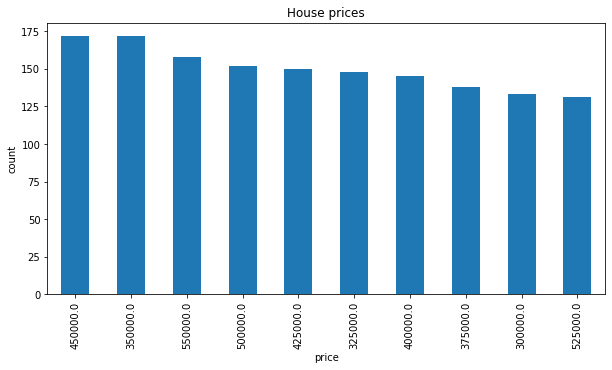

In [18]:
plt.figure(figsize = (10,5))
house['price'].value_counts().head(10).plot.bar()
plt.title('House prices')
plt.xlabel('price')
plt.ylabel('count')
plt.show()


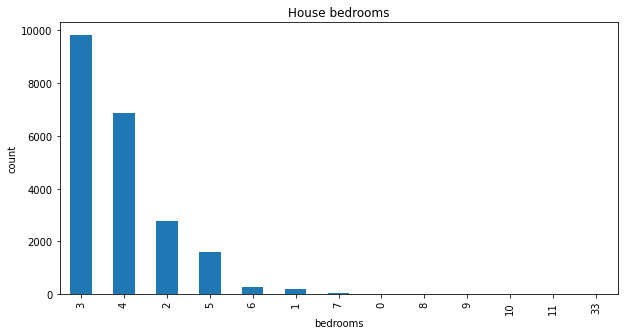

In [19]:
plt.figure(figsize = (10,5))
house['bedrooms'].value_counts().plot.bar()
plt.title('House bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

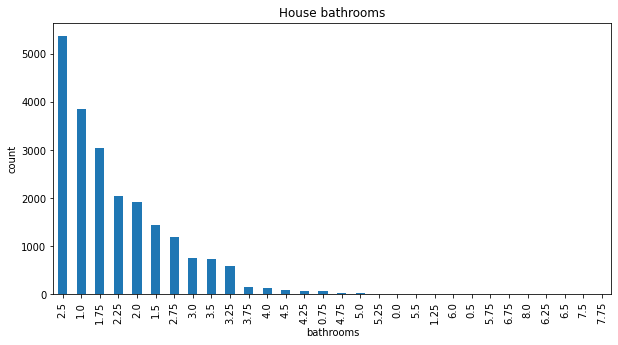

In [20]:
plt.figure(figsize = (10,5))
house['bathrooms'].value_counts().plot.bar()
plt.title('House bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

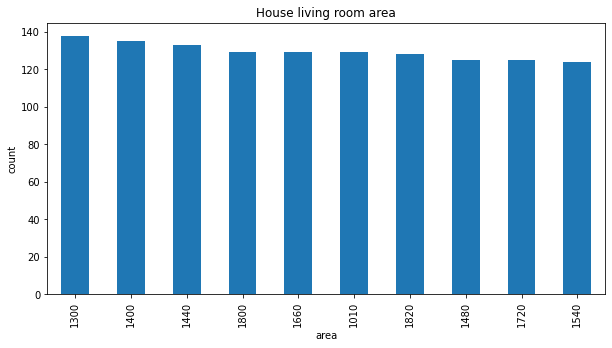

In [21]:
plt.figure(figsize = (10,5))
house['sqft_living'].value_counts().head(10).plot.bar()
plt.title('House living room area')
plt.xlabel('area')
plt.ylabel('count')
plt.show()

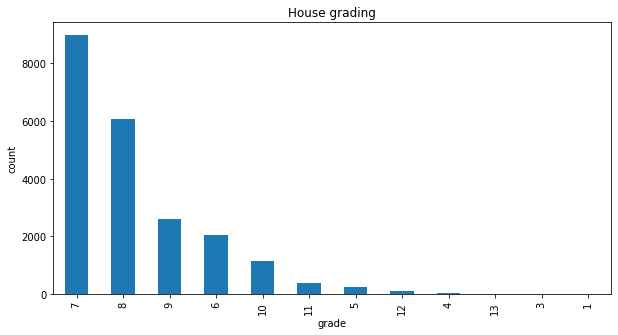

In [22]:
plt.figure(figsize = (10,5))
house['grade'].value_counts().plot.bar()
plt.title('House grading')
plt.xlabel('grade')
plt.ylabel('count')
plt.show()

## b.Bivariate

### i).Correlation

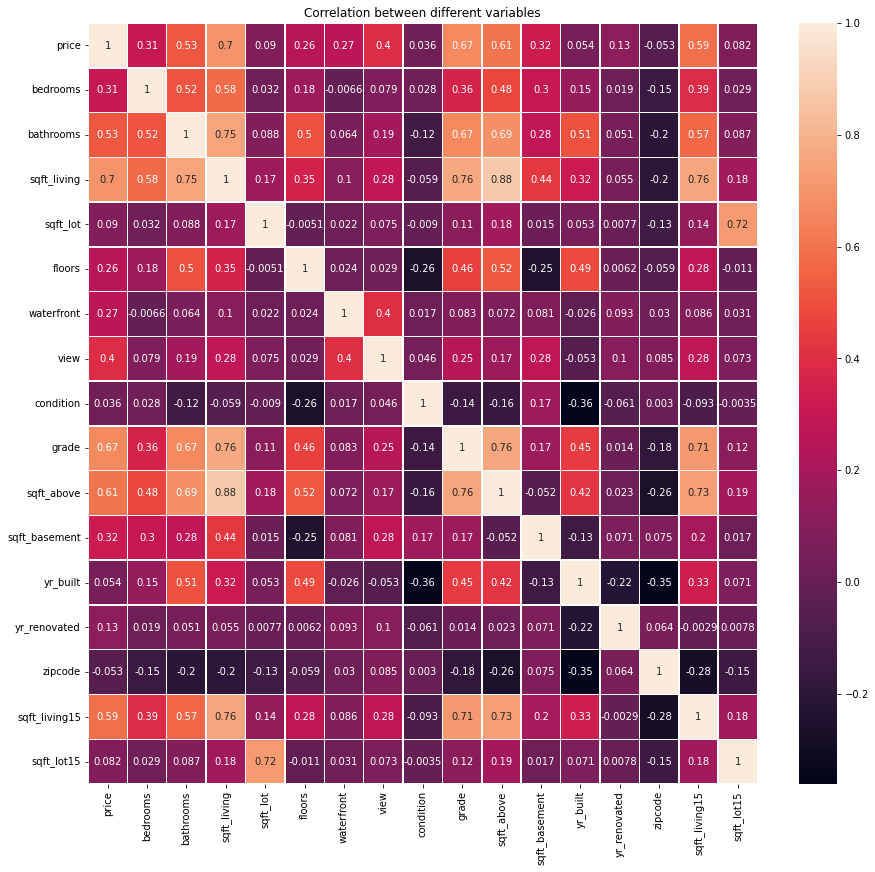

In [23]:
# Create a correlation matrix
corrMatrix = house.corr()
corrMatrix

# Vizualise the correlation matrix using a heat map

fig, ax = plt.subplots(figsize=(15,14)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)
plt.title('Correlation between different variables')
plt.show()

Grade, sqft_living, Sqft_living15 and Sqft_above have the highest positive correlation with 0.67, 0.7, 0.61 and 0.59.

## c.Multivariate Analysis

### LDA

In [24]:
# We will start by separating our data into independent and dependent variables
X = house.drop('price', axis =1)
y = house['price']

In [25]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [26]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X, y)
lda_feat = lda_. transform(X)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-2.53862033e+00, -5.83741682e+00,  2.95398977e-03, ...,
        -2.82619595e-02,  1.76994580e-04,  3.52409233e-05],
       [-7.59967291e-01,  4.49153213e-01, -6.91681312e-04, ...,
         2.37828266e-02,  3.28956633e-03,  2.02464482e-07],
       [-2.95735710e+00,  1.35348376e+00,  3.96328224e-04, ...,
        -5.87662300e-02,  4.72884875e-04,  8.62321994e-07],
       ...,
       [-6.70158649e+00,  1.28570509e+01,  1.47330423e-02, ...,
         4.35179985e-03, -1.00902866e-02, -4.11784789e-06],
       [-7.58557900e+00, -5.23739285e+00,  2.27087760e-02, ...,
        -3.65599014e-02, -9.00684568e-03, -8.08808472e-05],
       [-1.04166455e+01,  8.66455402e+00,  2.31589463e-02, ...,
        -1.09345781e-02, -1.32570207e-02, -8.72472159e-05]])

### Feature Importance

In [27]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
floors,1.133777
yr_built,0.163999
view,0.111109
sqft_living,0.002954
sqft_above,0.002142
sqft_basement,0.001735
yr_renovated,0.000279
sqft_living15,0.000177
sqft_lot15,0.000035
sqft_lot,-0.000007


In [28]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287


In [29]:
#reducing the independent variables
X1 = X[['floors', 'yr_built', 'view', 'sqft_living', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot', 'sqft_lot15']]
X1


,floors,yr_built,view,sqft_living,sqft_above,sqft_basement,yr_renovated,sqft_living15,sqft_lot,sqft_lot15
0,1.0,1955,0,1180,1180,0,0,1340,5650,5650
1,2.0,1951,0,2570,2170,400,1991,1690,7242,7639
2,1.0,1933,0,770,770,0,0,2720,10000,8062
3,1.0,1965,0,1960,1050,910,0,1360,5000,5000
4,1.0,1987,0,1680,1680,0,0,1800,8080,7503
...,...,...,...,...,...,...,...,...,...,...
21608,3.0,2009,0,1530,1530,0,0,1530,1131,1509
21609,2.0,2014,0,2310,2310,0,0,1830,5813,7200
21610,2.0,2009,0,1020,1020,0,0,1020,1350,2007
21611,2.0,2004,0,1600,1600,0,0,1410,2388,1287


# Multilinear Regression

In [30]:
#dataset already split 
X1
y

#splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=0)

In [31]:
#standardizing our dataset using standard scaller 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
scaled = scaler.transform(X1)

In [32]:
#Selecting our model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#Fitting the model:
model.fit(X_train,y_train )

LinearRegression()

In [33]:
#Making predictions
y_pred = model.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})\
#Checking the accuracy:
print("The OLS Accuracy is :",model.score(X_test, y_test )* 100)

The OLS Accuracy is : 58.09306523545561


In [34]:
#printing the RMSE
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 57340266527.12481


### Residual plots

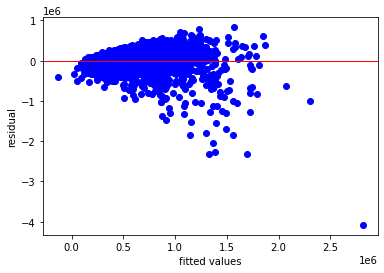

In [35]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred, y_test)

# Plot
plt.scatter(y_pred, residuals, color="blue")
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

### Heteroskedasticity test

In [36]:

#We shall use the Barlett's test to check for heteroskedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

6.815559508969777e-23
the variances are homogeneous!


The accuracy of our multiple linear regression model is 58.09% and MSE is 57340266527.12481. We will challenge the solution by trying out the other regression techniques with the aim of improving our prediction accuracy.

# Challenging the solution

## Ridge Regression

In [37]:
# We will perform Ridge regression
# Start by importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [38]:
#start building our model and choosing parameters
model=Ridge(normalize=True)
search=GridSearchCV(estimator=model,param_grid={"alpha":np.logspace(-2,12,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# We now use the .fit function to run the model and then use the .best_params_ and
# .best_scores_ function to determine the models strength. 
search.fit(X1,y)
search.best_params_

abs(search.best_score_) 

57816489217.2614

In [39]:
#printing the best parameter
print(search.best_params_)

{'alpha': 0.01}


In [40]:
#fitting our model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X1,y)
y_pred=ridge.predict(X1)
print("Ridge MSE:", mean_squared_error(y,y_pred))

Ridge MSE: 57017174830.54266


In [41]:
#Checking the accuracy:
print("Accuracy:",ridge.score(X_test, y_test )* 100)

Accuracy: 58.12810818385103


After evaluating the performance of our ridge model, we can see that there is no huge difference between the accuracies of the two models (58.12%)

The Ridge MSE is slightly lower than OLS MSE which means that ridge is better that OLS.

## Lasso Regression

In [42]:
# Start by importing the relevant libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore")

In [43]:
#lets start building our model
model=Lasso(normalize=True)
search=GridSearchCV(model,param_grid={"alpha":np.concatenate((np.arange(0.1,2,0.1),np.arange(2, 5, 0.5)))},cv=10)

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
search.fit(X_train, y_train) 

print("lasso best parameters:", search.best_params_) 

lasso best parameters: {'alpha': 4.5}


In [44]:
## Creating lasso regression with alpha value of 4.5
model=Lasso(alpha= 4.5,normalize=True)
model.fit(X1,y)
y_pred=model.predict(X_test)
print("lasso MSE:", mean_squared_error(y_test,y_pred))

lasso MSE: 57285537564.88049


In [45]:
#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test )* 100)

Accuracy: 58.13306370754885


Using Lasso regression technique, we can see that there is a slight improvement in accuracy (58.13%) as compared to the accuracy of our OLS model and ridge model.

The MSE is also slighly smaller than the OLS model but higher than the ridge MSE.

## Elastic Net Regression

In [46]:
# Import the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [47]:
model=ElasticNet(normalize=True)
search=GridSearchCV(model,param_grid={'alpha':np.logspace(-5,2,8),"l1_ratio":[0.2,0.4,0.6,0.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [48]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X1,y)
search.best_params_
abs(search.best_score_)

print("Elastic net best parameters:", search.best_params_) 

Elastic net best parameters: {'alpha': 1e-05, 'l1_ratio': 0.8}


In [49]:
## Creating lasso regression with alpha value of 1e-05
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio= 0.8)
elastic.fit(X1,y)
y_pred=elastic.predict(X1)
print("Elastic Net MSE:", mean_squared_error(y,y_pred)) 

Elastic Net MSE: 57069379488.23932


In [50]:
#Checking the accuracy:
print("Accuracy:",elastic.score(X_test, y_test )* 100)

Accuracy: 58.05362205880098


From the ElasticNet regression we can see that using the model is not justified because its accuracy of 58.05% is smaller than the other models

## Quantile regression

In [59]:
#split data into feature and target
X = house.drop(['price','sqft_above'],1)
y = house['price']

In [60]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
model = smf.quantreg('y~X',house)
res = model.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3971
Model:                       QuantReg   Bandwidth:                   2.391e+04
Method:                 Least Squares   Sparsity:                    3.433e+05
Date:                Sun, 13 Feb 2022   No. Observations:                21607
Time:                        09:49:47   Df Residuals:                    21591
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.6549      1.191    -18.185      0.000     -23.989     -19.321
X[0]       -2.866e+04   1609.816    -17.804      0.000   -3.18e+04   -2.55e+04
X[1]        3.019e+04   2774.496     10.881      0.000    2.48e+04    3.56e+04
X[2]          89.8573      3.099     28.993      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


In [55]:
# Finding the regression coefficients for the conditioned median, 0.75 quantile
model = smf.quantreg('y ~ X', house)
res = model.fit(q=.75)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4546
Model:                       QuantReg   Bandwidth:                   2.222e+04
Method:                 Least Squares   Sparsity:                    4.526e+05
Date:                Sun, 13 Feb 2022   No. Observations:                21607
Time:                        09:38:44   Df Residuals:                    21591
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.6012      1.736     -4.956      0.000     -12.003      -5.199
X[0]       -3.392e+04   2062.820    -16.445      0.000    -3.8e+04   -2.99e+04
X[1]        3.021e+04   3263.776      9.257      0.000    2.38e+04    3.66e+04
X[2]         132.5047      3.895     34.019      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)
